# **Extrovert vs. Introvert Behavior**

**Group 4**
1. Jovita Putri Aulia - 2702352616
2. Keyla Faritsha Rindani - 2702363254
3. Nabila Azwad Ambbiya - 2702322720
4. Renata Aqila Ridha Putri - 2702244284
5. Stephanie Nadya - 2702264576


  Dataset consists of 2900 rows and 8 columns. Below is an explanation each column

  1. Time_spent_Alone: Hours spent alone daily (0–11).
  2. Stage_fear: Presence of stage fright (Yes/No).
  3. Social_event_attendance: Frequency of social events (0–10).
  4. Going_outside: Frequency of going outside (0–7).
  5. Drained_after_socializing: Feeling drained after socializing (Yes/No).
  6. Friends_circle_size: Number of close friends (0–15).
  7. Post_frequency: Social media post frequency (0–10).
  8. Personality: Target variable (Extrovert/Introvert).*

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib

In [42]:
df = pd.read_csv("personality_dataset.csv")

df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [43]:
df.shape

(2900, 8)

Dataset ini berisi 2.900 data dengan 8 fitur yang berkaitan dengan perilaku sosial dan ciri kepribadian, yang dirancang untuk mengeksplorasi dan mengklasifikasikan individu sebagai ekstrovert atau introvert.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


Dari info ini bisa disimpulkan beberapa informasi:
- Data type pada tiap kolom sudah tepat.
- Ada missing values pada tiap kolom dataset kecuali kolom ‘Personality’.

In [45]:
df.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [46]:
for col in df.columns:
    print(col, df[col].value_counts())

Time_spent_Alone 0.0     369
2.0     357
3.0     353
1.0     326
9.0     206
10.0    196
4.0     190
7.0     190
5.0     180
8.0     180
6.0     150
11.0    140
Name: Time_spent_Alone, dtype: int64
Stage_fear No     1417
Yes    1410
Name: Stage_fear, dtype: int64
Social_event_attendance 2.0     408
0.0     378
1.0     322
3.0     317
4.0     255
6.0     239
7.0     239
9.0     236
5.0     224
8.0     206
10.0     14
Name: Social_event_attendance, dtype: int64
Going_outside 0.0    498
2.0    456
1.0    429
5.0    374
4.0    359
6.0    335
3.0    209
7.0    174
Name: Going_outside, dtype: int64
Drained_after_socializing No     1441
Yes    1407
Name: Drained_after_socializing, dtype: int64
Friends_circle_size 5.0     301
3.0     283
1.0     281
2.0     274
4.0     254
8.0     165
12.0    148
10.0    146
14.0    144
6.0     137
9.0     135
11.0    134
7.0     133
13.0    123
0.0     106
15.0     59
Name: Friends_circle_size, dtype: int64
Post_frequency 2.0     481
1.0     455
0.0     451
7

**Imputasi Missing Values**

In [47]:
i = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']

df[i].describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


Impute with mode

In [48]:
df['Stage_fear'].fillna(df['Stage_fear'].mode()[0], inplace=True)
df['Drained_after_socializing'].fillna(df['Drained_after_socializing'].mode()[0], inplace=True)

Impute with median

In [49]:
median_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Friends_circle_size', 'Post_frequency']
for col in median_cols:
    df[col].fillna(df[col].median(), inplace=True)

Impute with mean

In [50]:
df['Going_outside'].fillna(df['Going_outside'].mean(), inplace=True)

In [51]:
df.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [52]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [53]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.494828,3.942759,3.000000,6.235172,3.552069
std,3.441971,2.875987,2.221597,4.237255,2.894794
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,7.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


 Kesimpulan:
- Semua kolom sudah tidak ada missing values (count = 2900)

- Distribusi tidak berubah ekstrem setelah imputasi

- Tidak muncul nilai outlier baru

- Mean dan median tetap konsisten dengan kondisi sebelum imputasi

**Encoding**

In [54]:
binary ={"Stage_fear": {"No": 0, "Yes" : 1},
         "Drained_after_socializing": {"No" : 0, "Yes" : 1}}
df = df.replace(binary)

In [55]:
label = {"Personality": {"Extrovert": 0, "Introvert": 1}}
df = df.replace(label)

In [56]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,9.0,1,1.0,2.0,1,5.0,2.0,1
3,0.0,0,6.0,7.0,0,14.0,8.0,0
4,3.0,0,9.0,4.0,0,8.0,5.0,0


Terdapat 3 kolom yang perlu diencode dengan binary maupun label encoding, berikut rinciannya:
- Stage_fear dengan binary encoding
- Drained_after_socializing dengan binary encoding
- Personality dengan label encoding 

**Heatmap**

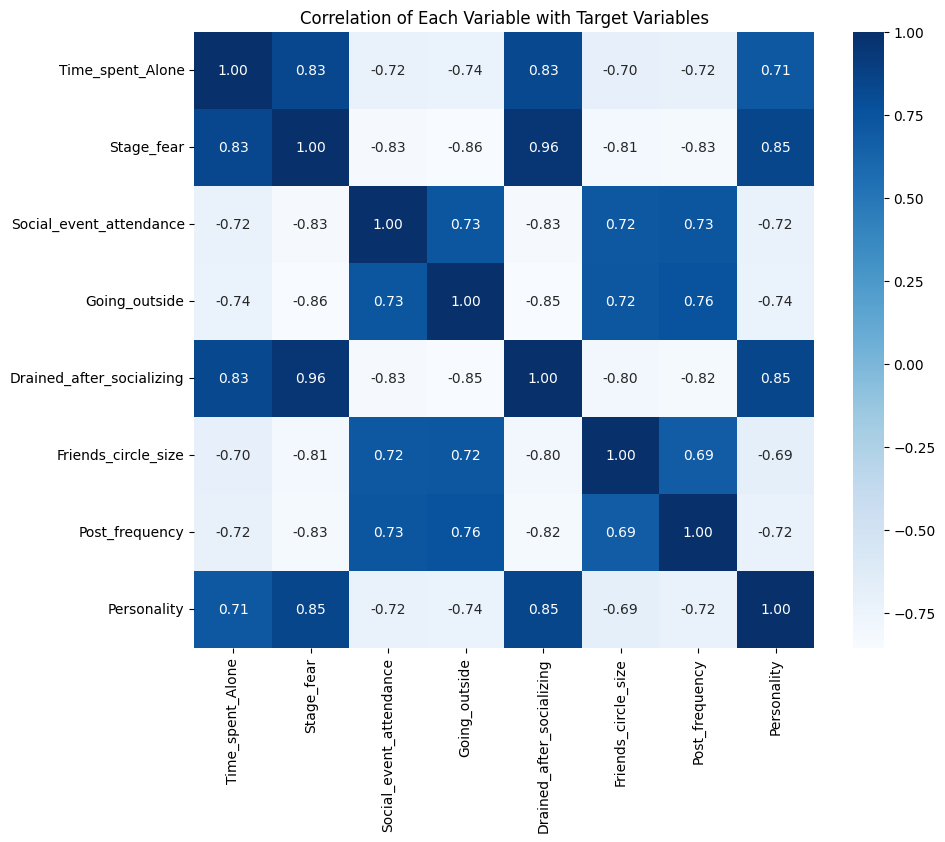

In [57]:
numeric_data = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation of Each Variable with Target Variables")
plt.show()

Heatmap ini menunjukkan korelasi antar variabel. Warna biru tua menandakan korelasi yang kuat, sedangkan biru muda menandakan korelasi lemah.
Beberapa poin penting:
- Time_spent_Alone berkorelasi positif dengan Stage_fear dan Drained_after_socializing.
- Stage_fear sangat berkorelasi dengan Drained_after_socializing (0.96).
- Personality berkorelasi negatif dengan variabel seperti Stage_fear dan Time_spent_Alone, menandakan kecenderungan ekstrover.

Heatmap ini membantu memahami hubungan antar fitur sebelum proses modeling


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   int64  
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   int64  
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 181.4 KB


## **Classification**

In [59]:
input_df=df.drop('Personality',axis=1)
output_df=df['Personality']

Kolom ‘Personality’ di set menjadi target variabel.

In [60]:
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 0)

Lalu, data dipisah menjadi 80% training dan 20% testing

In [61]:
print("shape X_train: ",x_train.shape)
print("shape X_test: ",x_test.shape)
print("shape y_train: ",y_train.shape)
print("shape y_test: ",y_test.shape)

shape X_train:  (2320, 7)
shape X_test:  (580, 7)
shape y_train:  (2320,)
shape y_test:  (580,)


**Random Forest**

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [63]:
RF_class = RandomForestClassifier()
RF_class.fit(x_train, y_train)
y_predict=RF_class.predict(x_test)

In [64]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       270
           1       0.93      0.91      0.92       310

    accuracy                           0.92       580
   macro avg       0.91      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580




Pada dataset ini, model Random Forest mampu mengklasifikasikan individu sebagai ekstrovert atau introvert dengan akurasi sebesar 91%.

Model ini menunjukkan keseimbangan performa pada kedua kelas, dengan nilai precision, recall, dan f1-score di atas 0.90. Hal ini menunjukkan bahwa model dapat mengenali pola perilaku dengan baik, tanpa cenderung bias terhadap salah satu kelas.


**Hyperparameter Tuning using RandomizedSearchCV**

In [65]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

Hyperparameter tuning dilakukan menggunakan RandomizedSearchCV, yaitu metode untuk mencari kombinasi parameter terbaik secara acak. Berikut arti masing-masing parameter yang diuji:
- n_estimators: Jumlah pohon dalam model.
- max_depth: Batas kedalaman pohon.
- min_samples_split: Minimum data untuk membagi node.
- min_samples_leaf: Minimum data pada daun pohon.
- max_features: Jumlah fitur yang dipakai saat split.


In [66]:
rf = RandomForestClassifier()

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

random_search.fit(x_train, y_train)

best_rf = random_search.best_estimator_

In [67]:
y_pred = best_rf.predict(x_test)
print(classification_report(y_test, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       270
           1       0.94      0.92      0.93       310

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



Setelah dilakukan hyperparameter tuning menggunakan RandomizedSearchCV model mengalami peningkatan nilai akurasi menjadi 93%

Ini menunjukkan bahwa pemilihan parameter yang tepat berdampak signifikan terhadap performa model.

**XG Boost**

In [68]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [69]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(x_train, y_train)
y_predict = xgb_model.predict(x_test)

In [70]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       270
           1       0.93      0.91      0.92       310

    accuracy                           0.92       580
   macro avg       0.91      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



Pada dataset ini, model XGBoost memiliki nilai akurasi sebesar 91% sama seperti Random Forest

XGBoost membangun model secara bertahap dengan memanfaatkan kesalahan dari iterasi sebelumnya, sehingga mampu menghasilkan prediksi yang lebih akurat dan stabil.

**Hyperparameter Tuning using GridSearchCV**

In [71]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 2]
}

- n_estimators: jumlah pohon yang digunakan dalam boosting.
- max_depth: kedalaman maksimum tiap pohon (mencegah overfitting).
- learning_rate: seberapa besar kontribusi setiap pohon baru (semakin kecil, training lebih lambat tapi akurat).
- min_child_weight: jumlah minimum sampel yang dibutuhkan untuk membuat node baru (mengontrol kompleksitas model).


In [72]:
grid_search_xgb = GridSearchCV(xgb_model,
                            param_grid = param_grid,
                            scoring='accuracy',
                            cv=5)

In [73]:
grid_search_xgb.fit(x_train,y_train)
print("Tuned Hyperparameters :", grid_search_xgb.best_params_)

Tuned Hyperparameters : {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 200}


In [74]:
best_model_xgb = grid_search_xgb.best_estimator_
y_predict_xgb = best_model_xgb.predict(x_test)

In [75]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict_xgb, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       270
           1       0.94      0.92      0.93       310

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



Setelah dilakukan hyperparameter tuning menggunakan GridSearchCV model mengalami peningkatan nilai akurasi menjadi 93%

menunjukkan bahwa pemilihan parameter yang tepat berdampak signifikan terhadap performa model.


## Pipeline Wrapping & Export .pkl

In [76]:
x_train.columns = x_train.columns.str.replace(" ", "_").str.replace("(", "").str.replace(")", "")
x_test.columns = x_test.columns.str.replace(" ", "_").str.replace("(", "").str.replace(")", "")



pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", best_rf)
])

pipeline.fit(x_train, y_train)
joblib.dump(pipeline, "trained_model.pkl")

C:\Users\Renata Aqila\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
C:\Users\Renata Aqila\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


['trained_model.pkl']

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   int64  
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   int64  
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 181.4 KB


In [78]:
model = joblib.load("trained_model.pkl")
print(model.named_steps["scaler"].feature_names_in_)


['Time_spent_Alone' 'Stage_fear' 'Social_event_attendance' 'Going_outside'
 'Drained_after_socializing' 'Friends_circle_size' 'Post_frequency']


In [79]:
sample = df.iloc[0].to_dict()
print(sample)

{'Time_spent_Alone': 4.0, 'Stage_fear': 0.0, 'Social_event_attendance': 4.0, 'Going_outside': 6.0, 'Drained_after_socializing': 0.0, 'Friends_circle_size': 13.0, 'Post_frequency': 5.0, 'Personality': 0.0}
